LR Accuracy: 0.83
LR Accuracy: 0.86
GDA Accuracy: 0.81
GDA Accuracy: 0.86


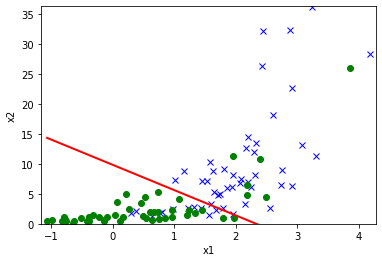

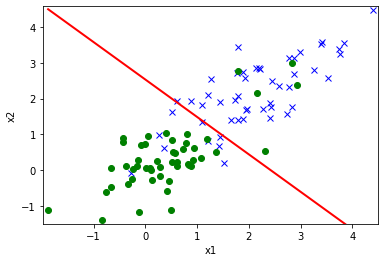

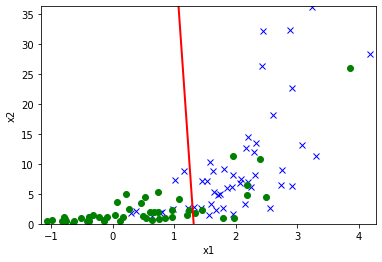

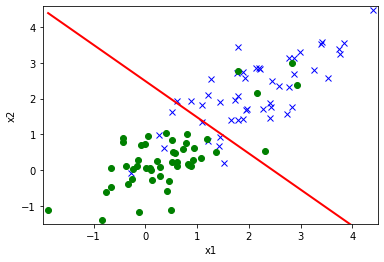

In [1]:
import numpy as np
import util


def main_GDA(train_path, valid_path, save_path):
    """Problem: Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        valid_path: Path to CSV file containing dataset for validation.
        save_path: Path to save predicted probabilities using np.savetxt().
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)

    # Train a GDA classifier
    clf = GDA()
    clf.fit(x_train, y_train)

    # Plot decision boundary on validation set
    x_eval, y_eval = util.load_dataset(valid_path, add_intercept=False)
    plot_path = save_path.replace('.txt', '.png')
    util.plot(x_eval, y_eval, clf.theta, plot_path)
    x_eval = util.add_intercept(x_eval)

    # Use np.savetxt to save outputs from validation set to save_path
    p_eval = clf.predict(x_eval)
    yhat = p_eval > 0.5
    print('GDA Accuracy: %.2f' % np.mean( (yhat == 1) == (y_eval == 1)))
    np.savetxt(save_path, p_eval)

class GDA:
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y by updating
        self.theta.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        #Function to calculate mu0
        def calc_mu0(x,y):            
            mu0 = np.array([x[y==k].mean(axis=0) for k in [0]])
            mu0 = mu0.reshape(x.shape[1],1)
            return mu0
            
        #Function to calculate mu1    
        def calc_mu1(x,y):
            mu1 = np.array([x[y==k].mean(axis=0) for k in [1]])
            mu1 = mu1.reshape(x.shape[1],1)
            return mu1
                   
        #Function to calculate sigma
        def calc_sigma(x,y,mu0,mu1):
            sigma=np.zeros((x.shape[1],x.shape[1]))
            for i in range(x.shape[0]):
                x_i = x[i,:].reshape(x.shape[1],1)
                mu_yi = mu1 if y[i]==1 else mu0
                sigma += (x_i-mu_yi).dot((x_i-mu_yi).T)
            sigma = (1/x.shape[0]) * sigma
            return sigma

        #Function to calculate phi
        def calc_phi(x,y):
            return y.mean()
            
        #Function to calculate theta
        def calc_theta(mu0, mu1, sigma, phi):
            S=np.linalg.inv(sigma)
            theta12=S.dot(mu1-mu0).flatten()
            a=mu0.T.dot(S.dot(mu0))
            b=mu1.T.dot(S.dot(mu1))
            theta0=1/2*(a-b)[0,0]-np.log((1-phi)/phi)
            
            return np.array([theta0, theta12[0],theta12[1]])
        
        #Calculate mu0
        mu0 = calc_mu0(x,y)
        
        #Calculate mu1
        mu1 = calc_mu1(x,y)

        #Calculate sigma
        sigma = calc_sigma(x,y,mu0,mu1)
        
        #Calculate phi
        phi = calc_phi(x,y)
        
        #Calculate theta
        self.theta = calc_theta(mu0, mu1, sigma, phi)
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        z = np.dot(x, self.theta)
        y_pred =  1.0 / (1.0 + np.exp(-z))
        return y_pred
        # *** END CODE HERE

def main_LogReg(train_path, valid_path, save_path):
    """Problem: Logistic regression with Newton's Method.

    Args:
        train_path: Path to CSV file containing dataset for training.
        valid_path: Path to CSV file containing dataset for validation.
        save_path: Path to save predicted probabilities using np.savetxt().
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=True)

    # Train a logistic regression classifier
    clf = LogisticRegression()
    clf.fit(x_train, y_train)

    # Plot decision boundary on top of validation set set
    x_eval, y_eval = util.load_dataset(valid_path, add_intercept=True)
    plot_path = save_path.replace('.txt', '.png')
    util.plot(x_eval, y_eval, clf.theta, plot_path)

    # Use np.savetxt to save predictions on eval set to save_path
    p_eval = clf.predict(x_eval)
    yhat = p_eval > 0.5
    print('LR Accuracy: %.2f' % np.mean( (yhat == 1) == (y_eval == 1)))
    np.savetxt(save_path, p_eval)

class LogisticRegression:
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=1000000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***
        self.theta = np.zeros(x.shape[1])
        
        #Calculating z
        def calcZ(x,theta):
            return np.dot(x, theta)

        #Calculating sigmoid
        def calcSigmoid(z):
            sigmoid = 1.0 / (1.0 + np.exp(-z)) 
            return sigmoid
        
        #Calculating the First Derivative
        def calcDer1(x,y,sigmoid):
            return np.dot((y-sigmoid), x)
        
        #Calculating the second Derivative
        def calcDer2(x,sigmoid):
            k = np.array([a*b for (a,b) in zip(x, sigmoid*(1-sigmoid))])
            return -1*np.dot(k.T,x)        
        
        #Implement Newton's Method to calculate theta        
        check = True
        while check:
                old_theta = self.theta
                #Calculate the value of z
                z=calcZ(x, self.theta)
                #Calculate the value of sigmoid
                sigmoid=calcSigmoid(z)
                #Calculate the first Derivative
                Der1 = calcDer1(x,y,sigmoid)
                #Calculate the second Derivative
                Der2 = calcDer2(x,sigmoid)
                
                #Calculate the new theta using Newton's Method
                self.theta = old_theta - np.dot(Der1, np.linalg.inv(Der2))
                #Difference between new and old theta
                diff = np.linalg.norm(self.theta - old_theta)
                #Check if the difference is less than the eps specified
                if abs(diff) < self.eps:
                    check = False
                    
        # *** END CODE HERE ***

    def predict(self, x):
        """Return predicted probabilities given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        z = np.dot(x, self.theta)
        return 1.0 / (1.0 + np.exp(-z)) 
        # *** END CODE HERE ***

if __name__ == '__main__':
    main_LogReg(train_path='ds1_train.csv',
         valid_path='ds1_valid.csv',
         save_path='logreg_pred_1.txt')

    main_LogReg(train_path='ds2_train.csv',
         valid_path='ds2_valid.csv',
         save_path='logreg_pred_2.txt')

    main_GDA(train_path='ds1_train.csv',
         valid_path='ds1_valid.csv',
         save_path='gda_pred_1.txt')

    main_GDA(train_path='ds2_train.csv',
         valid_path='ds2_valid.csv',
         save_path='gda_pred_2.txt')
